# Student performance prediction

## Load Dataset

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

df = pd.read_csv('student-por.csv', sep=';')
print("Dataset loaded. Shape:", df.shape)

Dataset loaded. Shape: (649, 33)


# Data Preprocessing

In [93]:
#Strip column names
df.columns = df.columns.str.strip()

# Encode binary columns
binary_cols = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
               'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
le = LabelEncoder()
for col in binary_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

## Create Target Variable

In [94]:
df['avg_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3
df['target'] = np.where(df['avg_grade'] >= 10, 1, 0)
df.drop(['G1', 'G2', 'G3', 'avg_grade'], axis=1, inplace=True)

## Train-Test Split

In [95]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Train Models

Logistic Regression is used for binary classification.
Decision Tree is a flowchart-like model that splits data based on feature values.
We fit (train) both models on the training data.

In [96]:
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Evaluate Models

In [97]:
models = {'Logistic Regression': lr, 'Decision Tree': dt}

for name, model in models.items():
    print(f"\nModel: {name}")
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.823076923076923
F1 Score: 0.8909952606635071
Confusion Matrix:
 [[13 18]
 [ 5 94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.42      0.53        31
           1       0.84      0.95      0.89        99

    accuracy                           0.82       130
   macro avg       0.78      0.68      0.71       130
weighted avg       0.81      0.82      0.81       130


Model: Decision Tree
Accuracy: 0.7384615384615385
F1 Score: 0.8191489361702128
Confusion Matrix:
 [[19 12]
 [22 77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.61      0.53        31
           1       0.87      0.78      0.82        99

    accuracy                           0.74       130
   macro avg       0.66      0.70      0.67       130
weighted avg       0.77      0.74      0.75       130



In [98]:
print(df.head())

   sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  studytime  \
0    0   18        1        0        0     4     4           2          2   
1    0   17        1        0        1     1     1           1          2   
2    0   15        1        1        1     1     1           1          2   
3    0   15        1        0        1     4     2           1          3   
4    0   16        1        0        1     3     3           1          2   

   failures  ...  Fjob_health  Fjob_other  Fjob_services  Fjob_teacher  \
0         0  ...        False       False          False          True   
1         0  ...        False        True          False         False   
2         0  ...        False        True          False         False   
3         0  ...        False       False           True         False   
4         0  ...        False        True          False         False   

   reason_home  reason_other  reason_reputation  guardian_mother  \
0        False         F

CHART

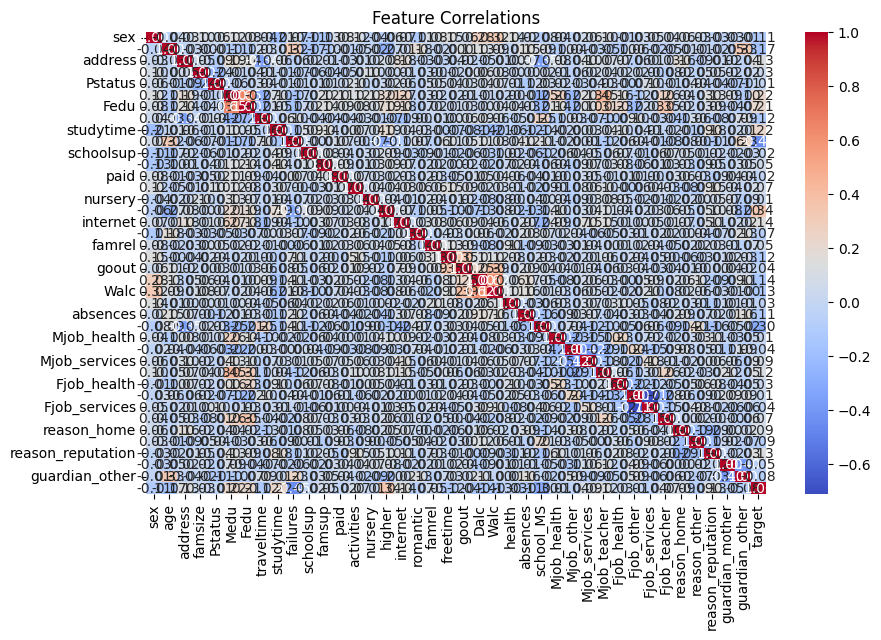

In [100]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")plt.show()